In [2]:
import yt
from yt.frontends.gizmo.api import GizmoDataset
from yt import YTArray
from yt import YTQuantity

import numpy as np
import h5py as h5
import os
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm, ListedColormap
import seaborn as sns
import palettable 
sns.set_style("ticks",{'axes.grid': True, 'grid.linestyle': '--'})

import importlib
import yt_helper as yth
import plotting_helper_functions as ph

/Users/irynabutsky/software/yt/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/irynabutsky/.config/yt/ytrc is deprecated in favor of /Users/irynabutsky/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0 . This feature will be removed in v4.1.0
  from yt.config import ytcfg


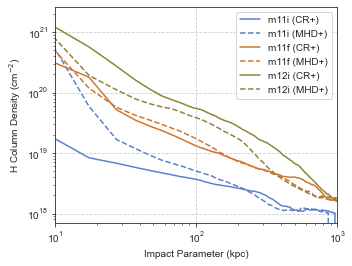

In [3]:
model_list = ['m11i', 'm11f', 'm12i']
#model_list = ['m12i', 'm12m', 'm12f']

palette = sns.color_palette()
palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]
    

fig, ax = plt.subplots(figsize=(5, 3.8))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10, 1e3)
ax.set_xlabel('Impact Parameter (kpc)')
ax.set_ylabel('H Column Density (cm$^{-2}$)')
for i, model in enumerate(model_list):
    impact, median = ph.get_radial_H_column(model+'_cr')
    ax.plot(impact, median, label = ph.get_label(model+"_cr"), color = palette[i])
    
    impact, median = ph.get_radial_H_column(model)
    ax.plot(impact, median, label = ph.get_label(model), color = palette[i],  linestyle = 'dashed')
ax.legend()
fig.tight_layout()
plt.savefig('plots/Hcol.png', dpi = 300)

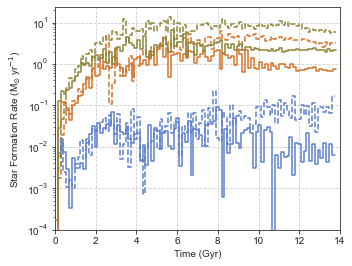

In [4]:
def plot_sfh(model_list, label_list = None):
    fig, ax = plt.subplots(figsize = (5, 3.8))
    if label_list is None:
        label_list = model_list
    palette = [palettable.wesanderson.Darjeeling2_5.mpl_colors[1], 
              palettable.wesanderson.Margot2_4.mpl_colors[-1], 
              palettable.wesanderson.Moonrise1_5.mpl_colors[2], 
              palettable.wesanderson.Moonrise4_5.mpl_colors[-1], 
              palettable.wesanderson.IsleOfDogs2_6.mpl_colors[0]]
    palette = [palettable.wesanderson.Moonrise2_4.mpl_colors[0], 
              palettable.wesanderson.Moonrise2_4.mpl_colors[1], 
              palettable.wesanderson.Moonrise1_5.mpl_colors[2], 
              palettable.wesanderson.Moonrise4_5.mpl_colors[-1], 
              palettable.wesanderson.IsleOfDogs2_6.mpl_colors[0]]
    palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]
    #palette = sns.color_palette()
   # palette = sns.color_palette("tab20c")[::4]
    for model, label, color in zip(model_list, label_list, palette):

        time, sfr = ph.get_sfh_data(model+"_cr")
        ax.plot(time, sfr, label = ph.get_label(model+"_cr"), color = color, zorder = 10)
        
        time, sfr = ph.get_sfh_data(model)
        ax.plot(time, sfr, label = ph.get_label(model), color = color, linestyle = 'dashed')
        
        
        
  #  ax.legend()
    ax.set_xlabel('Time (Gyr)')
    ax.set_ylabel('Star Formation Rate (M$_{\odot}$ yr$^{-1}$)')
    ax.set_xlim(0, 14)
    ax.set_yscale('log')
   # ax.set_ylim(0, 7)
    fig.tight_layout()
    plt.savefig('plots/sfr.png', dpi =300)
   
#generate_sfh_data(model_list[0])
model_list = ['m11i', 'm11f', 'm12i']
plot_sfh(model_list)

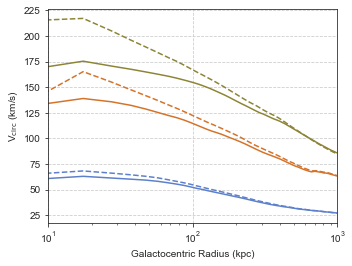

In [5]:
model_list = ['m11i', 'm11f', 'm12i']

palette = sns.color_palette()
palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]


fig, ax = plt.subplots(figsize=(5, 3.8))
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(10, 1e3)
ax.set_xlabel('Galactocentric Radius (kpc)')
ax.set_ylabel('V$_{\\rm circ}$ (km/s)')
for i, model in enumerate(model_list):
    impact, vcirc = ph.get_vcirc_profile(model+'_cr')
    ax.plot(impact, vcirc, label = ph.get_label(model+"_cr"), color = palette[i])
    
    impact, vcirc = ph.get_vcirc_profile(model)
    ax.plot(impact, vcirc, label = ph.get_label(model), color = palette[i],  linestyle = 'dashed')
#ax.legend()
fig.tight_layout()
plt.savefig('plots/vcirc.png', dpi = 300)

yt : [INFO     ] 2022-07-14 15:35:40,320 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-07-14 15:35:40,321 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-14 15:35:40,366 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-07-14 15:35:40,367 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-14 15:35:40,368 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-14 15:35:40,369 Parameters: domain_right_edge         = [40000. 40000. 40000.]
yt : [INFO     ] 2022-07-14 15:35:40,369 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-14 15:35:40,370 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-07-14 15:35:40,370 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-07-14 15:35:40,371 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-07-14 15:35:40,371 Parameters: omega_radiation           = 0.

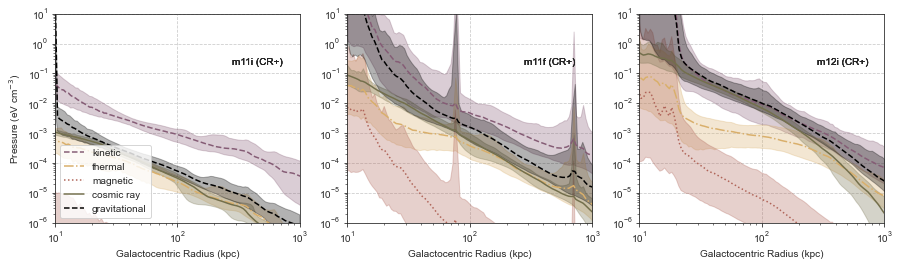

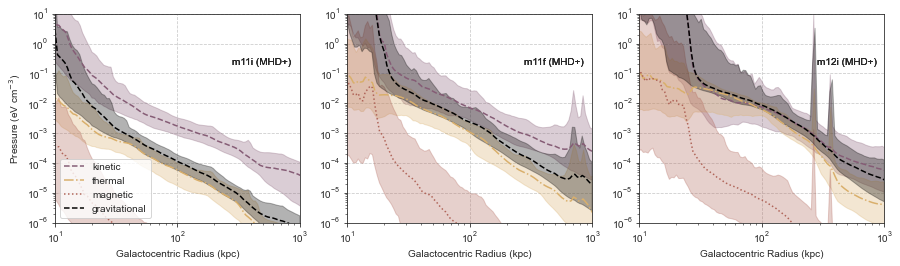

In [63]:
# plotting pressure profiles

importlib.reload(ph)
importlib.reload(yth)

def plot_pressure_profiles(model_type, weight_field = 'density', dens_threshold = None):
    
    pressure_field_list = ['kinetic_energy', 'pressure', 'magnetic_pressure']
    field_label_list = ['kinetic', 'thermal', 'magnetic', 'cosmic ray']
    linestyle_list = ['dashed', 'dashdot', 'dotted', 'solid']
    palette = palettable.cartocolors.qualitative.Antique_10.mpl_colors
    
    if model_type == 'cr':
        pressure_field_list.append('cosmic_ray_pressure')
        model_list = ['m11i_cr', 'm11f_cr', 'm12i_cr']
    else:
        model_list = ['m11i', 'm11f', 'm12i']


    fig, ax = plt.subplots(ncols = len(model_list), figsize = (4.2*len(model_list),3.8), 
                           sharex = True, sharey = False)
    ax[0].set_xlim(10, 1000)

    for i, model in enumerate(model_list):
       # data = ph.get_radial_pressure_profile_data(model, field_list = pressure_field_list, weight_field = weight_field)
        data = ph.load_pressure_profiles(model, field_list = pressure_field_list, dens_threshold = dens_threshold)
        r = data['radius']
        for j, field in enumerate(pressure_field_list):
            ax[i].plot(r, data['%s_median'%field], label = field_label_list[j], linestyle = linestyle_list[j], 
                       color = palette[j])
            ax[i].fill_between(r, data['%s_lowlim'%field][:], data['%s_uplim'%field][:], color = palette[j], alpha = 0.3)
            ax[i].text(2.8e2, 0.2, ph.get_label(model), )

        # add pgrav
        radius, pgrav, lowlim, uplim = ph.get_pgrav(model)
        ax[i].plot(radius, pgrav, color = 'black', linestyle = 'dashed', label = 'gravitational')
        ax[i].fill_between(radius, lowlim, uplim, color = 'black', alpha = 0.3)
        
                    
        ax[i].set_yscale('log')
        ax[i].set_xscale('log')
        ax[i].set_xlabel('Galactocentric Radius (kpc)')
        ax[0].set_ylabel('Pressure (eV cm$^{-3}$)')
        ax[i].set_ylim(1e-6, 10)

    ax[0].legend(loc = 3)
    fig.tight_layout()
    
    if model_type == 'cr':
        fig_label = 'cr'
    else:
        fig_label = 'mhd'
    if dens_threshold:
        plt.savefig('plots/pressure_profile_rho%e_%s.png'%(dens_threshold, fig_label), dpi = 300)
    else:
        plt.savefig('plots/pressure_profile_%s.png'%(fig_label), dpi = 300)


dens_threshold = None
plot_pressure_profiles('cr', dens_threshold = dens_threshold)
plot_pressure_profiles('mhd', dens_threshold = dens_threshold)


# NOTE check CR profiles for mass weighted and not. concerned the weighting was off inside the code


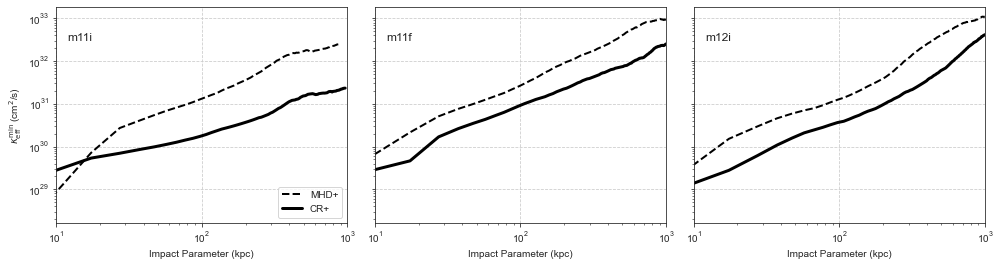

In [49]:
palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]

model_list = ['m11i', 'm11f', 'm12i']
#model_list = ['m12i', 'm11i', 'm11f']
#model_list = ['m12i', 'm12f', 'm12m']

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (14, 3.8), sharex = True, sharey = True)
for i, model in enumerate(model_list):
    
    impact, min_kappa = ph.get_min_diffusivity_estimate(model)
    ax[i].plot(impact, min_kappa, label = 'MHD+', color = 'black', linewidth = 2, linestyle = 'dashed')
    
    impact, min_kappa = ph.get_min_diffusivity_estimate(model+'_cr')
    ax[i].plot(impact, min_kappa, label = 'CR+', linewidth = 3, color = 'black')
    
    
    ax[i].text(12, 3e32, model, fontsize = 12)
    ax[i].set_xlabel('Impact Parameter (kpc)')




ax[0].legend(loc = 4)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlim(10, 1e3)
ax[0].set_ylabel('$\\kappa_{\\rm eff}^{\\rm min}$ (cm$^{2}$/s)')
fig.tight_layout()

plt.savefig('plots/kmin_eff.png', dpi = 300)

In [174]:
importlib.reload(yth)
ds, center = yth.load_ds('m12i_cr')

yt : [INFO     ] 2022-07-13 13:52:44,952 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-07-13 13:52:44,954 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-13 13:52:44,999 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-07-13 13:52:45,000 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-13 13:52:45,001 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-13 13:52:45,002 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2022-07-13 13:52:45,002 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-13 13:52:45,003 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-07-13 13:52:45,003 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-07-13 13:52:45,004 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-07-13 13:52:45,004 Parameters: omega_radiation           = 0.

yt : [INFO     ] 2022-07-14 15:34:36,228 Calculating time from 1.000e+00 to be 4.335e+17 seconds
yt : [INFO     ] 2022-07-14 15:34:36,230 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-14 15:34:36,273 Parameters: current_time              = 4.3348239819160384e+17 s
yt : [INFO     ] 2022-07-14 15:34:36,274 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-14 15:34:36,274 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-14 15:34:36,275 Parameters: domain_right_edge         = [58480. 58480. 58480.]
yt : [INFO     ] 2022-07-14 15:34:36,276 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-14 15:34:36,276 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2022-07-14 15:34:36,277 Parameters: omega_lambda              = 0.69
yt : [INFO     ] 2022-07-14 15:34:36,277 Parameters: omega_matter              = 0.31
yt : [INFO     ] 2022-07-14 15:34:36,278 Parameters: omega_radiatio

1901.8718309533367


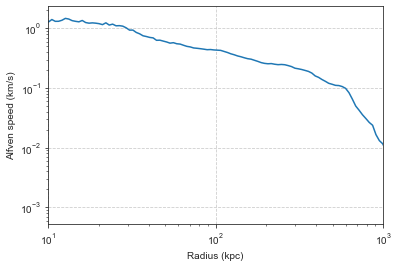

yt : [INFO     ] 2022-07-14 15:34:48,530 Calculating time from 1.000e+00 to be 4.335e+17 seconds
yt : [INFO     ] 2022-07-14 15:34:48,531 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-14 15:34:48,575 Parameters: current_time              = 4.3348239819160384e+17 s
yt : [INFO     ] 2022-07-14 15:34:48,576 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-14 15:34:48,576 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-14 15:34:48,577 Parameters: domain_right_edge         = [58480. 58480. 58480.]
yt : [INFO     ] 2022-07-14 15:34:48,578 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-14 15:34:48,578 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2022-07-14 15:34:48,579 Parameters: omega_lambda              = 0.69
yt : [INFO     ] 2022-07-14 15:34:48,579 Parameters: omega_matter              = 0.31
yt : [INFO     ] 2022-07-14 15:34:48,580 Parameters: omega_radiatio

Text(0.5, 0, 'Radius (kpc)')

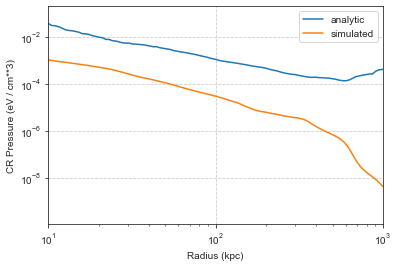

In [62]:
def calculate_alfven_profile(model, impact_list):
    ds, center = yth.load_ds(model)
    max_r = 1.2 * impact_list[-1]
    print(max_r)
    ad = ds.sphere(center, (max_r, 'kpc'))

    r_gas = ad[('gas', 'spherical_position_radius')].in_units('kpc') 
    rho = ad[('gas', 'density')].in_units('g/cm**3')
    va = ad[('gas', 'alfven_speed')].in_units('cm/s')
     
    med_list = np.array([])
    for i, impact in enumerate(impact_list):
        impact = YTQuantity(impact, 'kpc')
        if i == 0:
            g_mask = (r_gas < impact) 
        else:
            g_mask = (r_gas <= impact) & (r_gas > impact_list[i-1])
        g_mask = g_mask & (rho < 1e-26)
        med_list = np.append(med_list, np.mean(va[g_mask]))
    return YTArray(med_list, 'cm/s')

def analytic_Pcr(model, kappa = 1e29, sfr_time_interval = 1e9):
    impact_list = np.logspace(0.8, 3.2, 120)
    sfr = ph.estimate_sfr(model, time_interval = sfr_time_interval)
    #print(sfr)
    kappa = YTQuantity(kappa, 'cm**2/s')
    va = calculate_alfven_profile(model, impact_list)
    
    #todo: calculate dPcr... not sure if I should be doing this though. ni
    
    plt.loglog(impact_list, va.in_units('km/s'))
    plt.ylabel('Alfven speed (km/s)')
    plt.xlabel('Radius (kpc)')
    plt.xlim(10, 1e3)
    plt.show()
    impact_list = YTArray(impact_list, 'kpc')
    keff = impact_list*va
    
    
    Ecr_dt = YTQuantity(sfr* 0.1 * 1e49, 'erg/yr')
    
    Pcr = (Ecr_dt.in_units('erg/s') / (12 *np.pi * keff * impact_list.in_units('cm'))).in_units('eV / cm**3')
    return impact_list, Pcr



impact_list, Pcr_anal = analytic_Pcr('m11i_cr')
plt.loglog(impact_list, Pcr, label = 'analytic')

profile_data = ph.load_pressure_profiles('m11i_cr' )
plt.loglog(profile_data['radius'], profile_data['cosmic_ray_pressure_median'], label = 'simulated')

plt.legend()
plt.xlim(10, 1e3)
plt.ylabel('CR Pressure (eV / cm**3)')
plt.xlabel('Radius (kpc)')

    
    